<p>Name: Jake Antmann <br> Date: 4/12/23 <br> Assignment: Parkday Technical Take-Home </p>

<h1> Objectives </h1>

<p> The objective of this exercise is to analyze a set of user and meal data and 1) characterize the
data for insights, 2) implement meal recommendations, and 3) suggest next steps in a data
science pipeline buildout. </p>
<p></p>
<p> One of the key tasks at Parkday is to incorporate user preference data into our meal
recommendations. Our current onboarding process collects data from users such as dietary
style, allergens, spice tolerance, food values (sustainability, local, etc.), and fine-grained
preference information. The focus of this task is on the fine-grained preference information. </p>
<p></p>
<p> Your task is to provide us with a data-driven summary of our current user data and meal data
and implement meal recommendations, and suggest future directions for data collection,
analysis, and recommendation pipelines. </p>

<h1> Importing libraries & reading in dataframes </h1>

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataframes

userdf = pd.read_csv('/Users/jantmann17/Downloads/data_science_task_users.csv')
mealdf = pd.read_csv('/Users/jantmann17/Downloads/data_science_task_meals.csv')

/Users/jantmann17/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
userdf

,Unnamed: 0,user_id,user_name,ingredients
0,0,388,Apple John,"['baby radish', 'black garlic', 'cauliflower',..."
1,1,630,Shanelly Bazaldua,"['avocado', 'baby radish', 'chicken', 'fingerl..."
2,2,674,Peyton Joseph,"['anjou pear', 'avocado', 'baby radish', 'baby..."
3,3,828,Harshani Dharmadasa,"['anjou pear', 'baby white turnip', 'black gar..."
4,4,749,Koma Gandy,"['aleppo pepper', 'anjou pear', 'avocado', 'ba..."
...,...,...,...,...
181,181,756,Melvin Skochdopole,"['acorn squash', 'asian pears', 'avocado', 'av..."
182,182,779,Stacey Peterson,"['avocado', 'baby gem lettuce', 'black garlic'..."
183,183,647,Mark Cartier,"['aleppo pepper', 'anjou pear', 'avocado', 'ba..."
184,184,643,Tasha Plonka,"['aleppo pepper', 'anjou pear', 'avocado', 'ba..."


In [3]:
mealdf

,Unnamed: 0,flavors,id,ingredients,recipeName,cuisine,PrepTime,img
0,0,"{'piquant': 0.16666666666666666, 'meaty': 0.16...",Revolutionary-Mac-_-Cheese-1048867,"['dried pasta', 'milk', 'shredded cheddar chee...",Revolutionary Mac & Cheese,american,45.0,http://lh3.googleusercontent.com/XR_Pm7z37o_bE...
1,1,"{'piquant': 0.8333333333333334, 'meaty': 0.666...",Chicago-Chicken-822419,"['jalapeno chilies', 'lemon', 'dried oregano',...",Chicago Chicken,american,25.0,http://lh4.ggpht.com/MWZwpDEiAwju4NPKBTlx4UItD...
2,2,NaN,Pork-chops-with-balsamic-glaze-310062,"['boneless center cut pork chops', 'salt', 'gr...",Pork Chops with Balsamic Glaze,american,25.0,https://lh3.googleusercontent.com/Li9U8rdiYVI7...
3,3,"{'piquant': 0.6666666666666666, 'meaty': 1.0, ...",Chicken-Avocado-Burgers-1031197,"['ground chicken', 'avocado', 'chopped garlic'...",Chicken Avocado Burgers,american,15.0,http://lh3.googleusercontent.com/Sgul-1UaHFREU...
4,4,NaN,Country-fried-steak-recipe-with-gravy-306991,"['steak', 'eggs', 'buttermilk', 'flour', 'vege...",Country Fried Steak Recipe With Gravy,american,40.0,http://lh5.ggpht.com/MI_T7zt3Wk6fyfJkDC4BbJ6Iq...
...,...,...,...,...,...,...,...,...
16562,16562,"{'piquant': 0.16666666666666666, 'meaty': 0.66...",Fish-Sticks-with-Thai-Peanut-Sauce-1183636,"['tilapia fillets', 'panko breadcrumbs', 'coco...",Fish Sticks with Thai Peanut Sauce,thai,25.0,http://lh3.googleusercontent.com/9iE5MT6qkZUzm...
16563,16563,NaN,Grain-free-Thai-Chicken-Meatballs-with-Coconut...,"['dark meat', 'almond flour', 'scallions', 'ga...",Grain-free Thai Chicken Meatballs with Coconut...,thai,45.0,https://lh3.googleusercontent.com/qNA6P8TAZDYC...
16564,16564,NaN,Thai-Coconut-Chicken-Red-Lentil-Soup-1796917,"['olive oil', 'onions', 'red bell pepper', 'ga...",Thai Coconut Chicken Red Lentil Soup,thai,50.0,https://lh3.googleusercontent.com/W9dmUfOGvhjM...
16565,16565,NaN,Thai-Mushroom-Curry-1801070,"['straw mushrooms', 'coconut milk', 'chicken s...",Thai Mushroom Curry,thai,25.0,https://lh3.googleusercontent.com/pBiJkoVqfj5F...


<h1> Cleaning & Preprocessing </h1>

In [4]:
# The index column for both datasets read in as "Unnamed: 0" which is not helpful, so I will remove it
userdf = userdf.drop('Unnamed: 0', axis = 1)
mealdf = mealdf.drop('Unnamed: 0', axis = 1)

In [5]:
# I'm going to rename the 'id' column for the meal data to make it easier to aggregate on and compare to user data
mealdf = mealdf.rename(columns={'id' : 'meal_id'})
mealdf.head()

,flavors,meal_id,ingredients,recipeName,cuisine,PrepTime,img
0,"{'piquant': 0.16666666666666666, 'meaty': 0.16...",Revolutionary-Mac-_-Cheese-1048867,"['dried pasta', 'milk', 'shredded cheddar chee...",Revolutionary Mac & Cheese,american,45.0,http://lh3.googleusercontent.com/XR_Pm7z37o_bE...
1,"{'piquant': 0.8333333333333334, 'meaty': 0.666...",Chicago-Chicken-822419,"['jalapeno chilies', 'lemon', 'dried oregano',...",Chicago Chicken,american,25.0,http://lh4.ggpht.com/MWZwpDEiAwju4NPKBTlx4UItD...
2,NaN,Pork-chops-with-balsamic-glaze-310062,"['boneless center cut pork chops', 'salt', 'gr...",Pork Chops with Balsamic Glaze,american,25.0,https://lh3.googleusercontent.com/Li9U8rdiYVI7...
3,"{'piquant': 0.6666666666666666, 'meaty': 1.0, ...",Chicken-Avocado-Burgers-1031197,"['ground chicken', 'avocado', 'chopped garlic'...",Chicken Avocado Burgers,american,15.0,http://lh3.googleusercontent.com/Sgul-1UaHFREU...
4,NaN,Country-fried-steak-recipe-with-gravy-306991,"['steak', 'eggs', 'buttermilk', 'flour', 'vege...",Country Fried Steak Recipe With Gravy,american,40.0,http://lh5.ggpht.com/MI_T7zt3Wk6fyfJkDC4BbJ6Iq...


It appears that the meal_id values contain information already provided in recipeName. I will make it easier to distinguish between meal_ids by reducing it to the id number.

In [6]:
# Testing for one value
testid = mealdf['meal_id'][0]
splittestid = testid.split('-')[-1]
print(testid) # Original value
print(splittestid) # New value

Revolutionary-Mac-_-Cheese-1048867
1048867


In [7]:
# Applying to all the values of meal_id

# Creating a function that splits the meal_id in the manner displayed above, leaving only the #
def id_string(x) :
    new_x = x.split('-')[-1]
    return new_x

# Applying new function that splits the meal_id and making it such that the number takes on those values in the column
mealdf['meal_id'] = mealdf['meal_id'].apply(id_string)

In [8]:
### Taking a peek at some qualities of each dataset

# Length of each dataset
print('userdf length:', len(userdf))
print('mealdf length:', len(mealdf), '\n')

# Missing values for each dataset
print('userdf missing values', userdf.isna().sum(), sep = '\n')
print()
print('mealdf missing values', mealdf.isna().sum(), sep = '\n')
print()

# I see that the only column that contains missing values is flavors of the meal dataset. I'll return to this later.

userdf length: 186
mealdf length: 16567 

userdf missing values
user_id        0
user_name      0
ingredients    0
dtype: int64

mealdf missing values
flavors        5046
meal_id           0
ingredients       0
recipeName        0
cuisine           0
PrepTime          0
img               0
dtype: int64



I'm going to look through the features of each data set one by one to start off and try to identify if there 
will be any potential trouble points, as well as move some data around to make it easier to extract what I would
like to look at.

<h3> Ingredients </h3>

In [9]:
# Quick look at ingredients column for both user data and meal data
print(userdf['ingredients'][0])

print(mealdf['ingredients'][0])

['baby radish', 'black garlic', 'cauliflower', 'cauliflower steak', 'chicken', 'dover sole', 'fingerling potato', 'fuji apple relish', 'garlic chive', 'herbs', 'lamb', 'oregano', 'parmesan cheese', 'parsnip mousseline', 'rigatoni', 'rigatoni with braised lamb', 'roasted chicken', 'sautéed dover sole with fuji apple relish', 'shallot', 'toasted almonds']
['dried pasta', 'milk', 'shredded cheddar cheese', 'salt', 'dijon mustard']


In [10]:
# Making sure each row is a list as seen above for user data
type_counts1 = {}

for x in userdf['ingredients']:
    xtype = type(x)
    if xtype not in type_counts1:
        type_counts1[xtype] = 1
    else:
        type_counts1[xtype] += 1

print(type_counts1)

# Repeating the process for meal data
type_counts2 = {}

for x in mealdf['ingredients']:
    xtype = type(x)
    if xtype not in type_counts2:
        type_counts2[xtype] = 1
    else:
        type_counts2[xtype] += 1

print(type_counts2)

{<class 'str'>: 186}
{<class 'str'>: 16567}


<p> I was surprised to find that instead of being lists as it originally appeared, the ingredients column contained 
values that appeared as lists but were actually strings.</p>
<p></p>
<p> At this point I did some searching on the web to see if there was a module to make this any easier. I found the 'ast'module-- standing for "abstract syntax trees". I could use this to easily make this sneaky strings into proper lists. </p>

In [11]:
import ast

# Testing process of converting these strings to lists with one row
test_str = userdf['ingredients'][100]
test_list = ast.literal_eval(test_str)
print(test_str) # printing the baseline -- what the value of the ingredients column looks like
print("The above object is", type(test_str)) # printing the data type of that baseline

print(test_list) # printing following the conversion to a list, ensure that it looks the same
print("The above object is", type(test_list)) # confirming that the data type has changed to list

['avocado', 'baby radish', 'black garlic', 'cauliflower', 'cauliflower steak', 'celery leaf', 'chicken', 'chilled white asparagus', 'cilantro', 'fingerling potato', 'manchego cheese', 'oregano', 'parsnip mousseline', 'roasted chicken', 'toasted almonds', 'white asparagus', 'white truffle dressing']
The above object is <class 'str'>
['avocado', 'baby radish', 'black garlic', 'cauliflower', 'cauliflower steak', 'celery leaf', 'chicken', 'chilled white asparagus', 'cilantro', 'fingerling potato', 'manchego cheese', 'oregano', 'parsnip mousseline', 'roasted chicken', 'toasted almonds', 'white asparagus', 'white truffle dressing']
The above object is <class 'list'>


In [12]:
# Apply the above process to each value of the ingredients column
userdf['ingredients'] = userdf['ingredients'].apply(ast.literal_eval)

In [13]:
# Checking that the above apply function has successfully converted each value in the column to a list
troublecount1 = 0
for x in userdf['ingredients'] :
    if not isinstance(x, list):
        troublecount1 += 1
print(troublecount1)

0


Because this printed with a value of 0, this indicates all values in this column are a list
<p></p>

In [14]:
# The string vs list issue has been fixed for the user data-- now let's fix the meal data
mealdf['ingredients'] = mealdf['ingredients'].apply(ast.literal_eval)

In [15]:
# Checking that the above apply function has successfully converted each value in the column to a list
troublecount2 = 0 
for x in userdf['ingredients'] :
    if not isinstance(x, list):
        troublecount2 += 1
print(troublecount2) 

0


Because this printed with a value of 0, this indicates all values in this column are a list.

<h3> Flavors </h3>

This is where we saw some missing values, so we have a decision to make as to how we want to proceed. 

In [16]:
# Using method previously employed to examine the data types for the flavor column
type_counts3 = {}

for x in mealdf['flavors']:
    xtype = type(x)
    if xtype not in type_counts3:
        type_counts3[xtype] = 1
    else:
        type_counts3[xtype] += 1

print(type_counts3)

{<class 'str'>: 11521, <class 'float'>: 5046}


<p> We see that there are 5046 floats, the same number of null values found previously. This is because 'nan' in python is classified as a float. </p>
<p></p>
<p> We also see that the rest of the values for the flavors column are strings. However, based on looking at the dataframe before, we can see that these points really are dictionaries, associating some sort of score out of 1 to each flavor listed for each meal. Thus, we need to properly convert them to dictionaries as we had done with lists for ingredients. </p>
<p></p> 
<p> Because the rest of the values in the flavors column will be dictionaries and the number of rows with missing values for it (nearly a third of the data) is so high, we cannot simply drop these datapoints. It also doesn't make sense to impute them based on the fact that they are dictionaries with different keys in each, and even if they did all have the same keys, setting the flavor score as something like the mean or median could be very misrepresentative dependent on the meal. The best option here appears to be to fill these missing values with empty dictionaries. </p>
<p></p>
<p> Once we fill with empty dictionaries, then we can convert all of the rows to actual dictionaries instead of strings that look like dictionaries. </p>

In [17]:
# Filling the nan values with strings that look like empty dictionaries to make the next step easier
mealdf['flavors'] = mealdf['flavors'].fillna('{}')

In [18]:
# Using ast module to convert strings to dictionaries
mealdf['flavors'] = mealdf['flavors'].apply(ast.literal_eval)

In [19]:
# Again checking that all of the rows have properly been converted to dictionaries
troublecount3 = 0 
for x in mealdf['flavors'] :
    if not isinstance(x, dict):
        troublecount3 += 1
print(troublecount3) # Because this printed with a value of 0, this indicates all values in this column are a dictonary

0


Now, all of the missing values have been addressed as we filled them with empty dictionaries, and all of the rows that were strings disguised as dictionaries are properly dictionaries.

<h1> Some exploratory data analysis </h1>

In [20]:
userdf

,user_id,user_name,ingredients
0,388,Apple John,"[baby radish, black garlic, cauliflower, cauli..."
1,630,Shanelly Bazaldua,"[avocado, baby radish, chicken, fingerling pot..."
2,674,Peyton Joseph,"[anjou pear, avocado, baby radish, baby white ..."
3,828,Harshani Dharmadasa,"[anjou pear, baby white turnip, black garlic, ..."
4,749,Koma Gandy,"[aleppo pepper, anjou pear, avocado, baby caul..."
...,...,...,...
181,756,Melvin Skochdopole,"[acorn squash, asian pears, avocado, avocado t..."
182,779,Stacey Peterson,"[avocado, baby gem lettuce, black garlic, broc..."
183,647,Mark Cartier,"[aleppo pepper, anjou pear, avocado, baby caul..."
184,643,Tasha Plonka,"[aleppo pepper, anjou pear, avocado, baby caul..."


In [21]:
mealdf

,flavors,meal_id,ingredients,recipeName,cuisine,PrepTime,img
0,"{'piquant': 0.16666666666666666, 'meaty': 0.16...",1048867,"[dried pasta, milk, shredded cheddar cheese, s...",Revolutionary Mac & Cheese,american,45.0,http://lh3.googleusercontent.com/XR_Pm7z37o_bE...
1,"{'piquant': 0.8333333333333334, 'meaty': 0.666...",822419,"[jalapeno chilies, lemon, dried oregano, olive...",Chicago Chicken,american,25.0,http://lh4.ggpht.com/MWZwpDEiAwju4NPKBTlx4UItD...
2,{},310062,"[boneless center cut pork chops, salt, ground ...",Pork Chops with Balsamic Glaze,american,25.0,https://lh3.googleusercontent.com/Li9U8rdiYVI7...
3,"{'piquant': 0.6666666666666666, 'meaty': 1.0, ...",1031197,"[ground chicken, avocado, chopped garlic, pank...",Chicken Avocado Burgers,american,15.0,http://lh3.googleusercontent.com/Sgul-1UaHFREU...
4,{},306991,"[steak, eggs, buttermilk, flour, vegetable oil...",Country Fried Steak Recipe With Gravy,american,40.0,http://lh5.ggpht.com/MI_T7zt3Wk6fyfJkDC4BbJ6Iq...
...,...,...,...,...,...,...,...
16562,"{'piquant': 0.16666666666666666, 'meaty': 0.66...",1183636,"[tilapia fillets, panko breadcrumbs, coconut m...",Fish Sticks with Thai Peanut Sauce,thai,25.0,http://lh3.googleusercontent.com/9iE5MT6qkZUzm...
16563,{},2058860,"[dark meat, almond flour, scallions, garlic, f...",Grain-free Thai Chicken Meatballs with Coconut...,thai,45.0,https://lh3.googleusercontent.com/qNA6P8TAZDYC...
16564,{},1796917,"[olive oil, onions, red bell pepper, garlic, y...",Thai Coconut Chicken Red Lentil Soup,thai,50.0,https://lh3.googleusercontent.com/W9dmUfOGvhjM...
16565,{},1801070,"[straw mushrooms, coconut milk, chicken stock,...",Thai Mushroom Curry,thai,25.0,https://lh3.googleusercontent.com/pBiJkoVqfj5F...


In [22]:
# Take a look at some of the general numbers for prep time
mealdf['PrepTime'].describe()

count    16567.000000
mean        93.184475
std        282.122555
min          1.000000
25%         35.000000
50%         50.000000
75%         80.000000
max       8760.000000
Name: PrepTime, dtype: float64

In [23]:
# Examine the average prep time for meals grouped by cuisine
mealgroup1 = mealdf['PrepTime'].groupby(mealdf['cuisine']).mean().sort_values(ascending = False)
mealgroup1

cuisine
german        267.476429
portuguese    168.379252
irish         166.649471
cuban         135.194368
hungarian     109.116667
hawaiian       91.755181
english        91.272044
french         89.611336
swedish        83.405556
moroccan       80.601610
american       76.618318
indian         73.051153
mexican        72.715306
spanish        66.378519
chinese        60.907723
greek          59.424273
japanese       57.100908
italian        54.364552
thai           47.902736
Name: PrepTime, dtype: float64

In [24]:
# Examine the average number of ingredients grouped by cuisine
mealdf['num_ingredients'] = mealdf['ingredients'].apply(len)

mealgroup2 = mealdf['num_ingredients'].groupby(mealdf['cuisine']).mean().sort_values(ascending = False)
mealgroup2

cuisine
moroccan      15.736419
indian        14.671013
spanish       14.377477
greek         13.986961
thai          13.944276
swedish       13.522222
cuban         13.476648
french        13.296559
irish         12.461640
chinese       12.274824
hungarian     12.223333
english       12.121242
portuguese    11.918367
american      11.579580
japanese      11.399596
german        11.066199
hawaiian      10.510363
mexican       10.122449
italian        8.871098
Name: num_ingredients, dtype: float64

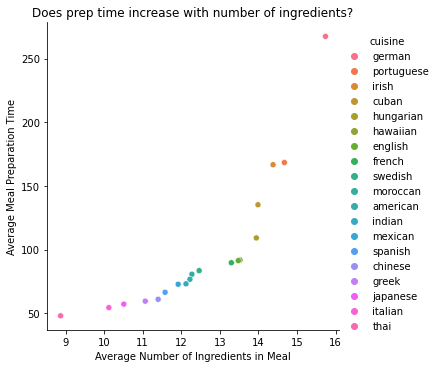

In [25]:
# Let's visualize the above findings

# Creating a new dataframe that pulls together the cuisine times, the average prep times, and average ingredient #s
grouped_df = pd.DataFrame({'cuisine' : mealgroup1.index, 'PrepTime' : mealgroup1.values, 'avg_ingredients' : mealgroup2.values})

# Creating a scatterplot comparing the average # of ingredients and average prep time by cuisine type
cuisineprep_bp = sns.relplot(data = grouped_df,
                              x = 'avg_ingredients', 
                              y = 'PrepTime',
                              hue = 'cuisine')

cuisineprep_bp.set(xlabel = 'Average Number of Ingredients in Meal',
                  ylabel = 'Average Meal Preparation Time', 
                  title = 'Does prep time increase with number of ingredients?')